# Week 08 Homework
### 8.1

Last week you practiced single band raster calculations using Sentinel-2 satellite remote sensing data. This week you will practice working with the multiple bands associated with Sentinel-2 data in order to create RGB composites and other band manipulations. 

The Sentinel-2 bands are as follows:

![_._](img/sentinel-2-bands.jpg)

You will compare RGB and NDVI images from May 2018 (```data/pre-woolsey-fire/```) and February 2019 (```data/post-woolsey-fire```) over the Santa Monica Mountains which correspond to pre and post-Woolsey fire. The Woolsey fire occured in November 2018. 

1. Create an **automated workflow** which loads, stacks and cleans the bands of a single Sentinel-2 date. 


In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

In [3]:
# Create the path to your datam
landsat_pre_path = os.path.join("data","pre-woolsey-fire")
landsat_post_path = os.path.join("data","post-woolsey-fire")

In [4]:
# Generate a list of tiff files for pre and post paths
post_paths = glob(os.path.join(landsat_post_path,
                                        "*B*.tiff"))
pre_paths = glob(os.path.join(landsat_pre_path,
                                        "*B*.tiff"))

In [5]:
post_paths.sort()
pre_paths.sort()
post_paths

['data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B12_(Raw).tiff',

In [6]:
# Create function to clean bands
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [7]:
# Open all bands in a loop and apply clean function
post_all_bands = []
for i, aband in enumerate(post_paths):
    post_clean = open_clean_bands(aband)
    post_clean["band"]=i+1
    post_all_bands.append(post_clean)
    
post_xr = xr.concat(post_all_bands, dim="band") 
post_xr

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
        [ 1.,  1.,  1., ..., 18., 20., 31.],
        [ 1.,  1.,  1., ..., 18., 20., 25.],
        [ 1.,  1.,  1., ..., 22., 17., 23.]],

       [[10., 12., 23., ..., 46., 41., 46.],
        [12., 22., 22., ..., 67., 36., 45.],
        [27., 22., 22., ..., 59., 32., 30.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

2. Run this workflow for both dates: pre and post Woolsey fire.

In [8]:
# Repeat for pre fire data
pre_all_bands = []
for i, aband in enumerate(pre_paths):
    pre_clean = open_clean_bands(aband)
    # Assign a band number to the new xarray object
    pre_clean["band"]=i+1
    pre_all_bands.append(pre_clean)
    
pre_xr = xr.concat(pre_all_bands, dim="band") 
pre_xr

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 13.,  16.,  20., ...,  47.,  43.,  57.],
        [ 16.,  19.,  15., ...,  58.,  36.,  49.],
        [ 20.,  19.,  13., ...,  54.,  30.,  37.],
        ...,
        [ 12.,  12.,  12., ...,  23.,  24.,  27.],
        [ 12.,  11.,  12., ...,  27.,  27.,  26.],
        [ 12.,  12.,  12., ...,  24.,  24.,  27.]],

       [[ 18.,  20.,  25., ...,  58.,  47.,  63.],
        [ 21.,  24.,  17., ...,  76.,  40.,  53.],
        [ 26.,  24.,  16., ...,  65.,  34.,  35.],
        ...,
        [ 12.,  12.,  12., ...,  26.,  31.,  34.],
        [ 12.,  12.,  12., ...,  31.,  31.,  32.],
        [ 13.,  12.,  12., ...,  29.,  26.,  32.]],

       [[ 27.,  29.,  31., ...,  61.,  50.,  66.],
        [ 30.,  29.,  20., ...,  82.,  42.,  55.],
        [ 33.,  30.,  18., ...,  71.,  38.,  40.],
        ...,
...
        ...,
        [  7.,   7.,   7., ...,  51.,  58.,  59.],
        [  7.,   7.,   7., ...,  57.,  59.,  63.],
        [  8.,   7.,   7., ...,  56.,  53.,  52.]],

       [[ 60.,  66.,  98., ...,  80.,  50.,  61.],
        [ 71.,  93.,  55., ...,  74.,  47.,  51.],
        [ 96.,  97.,  45., ...,  66.,  52.,  56.],
        ...,
        [  7.,   7.,   7., ...,  44.,  50.,  47.],
        [  7.,   6.,   7., ...,  51.,  52.,  56.],
        [  7.,   7.,   6., ...,  48.,  45.,  44.]],

       [[ 95.,  89.,  59., ...,  63.,  63.,  84.],
        [ 91.,  62.,  36., ...,  91.,  51.,  65.],
        [ 69.,  61.,  32., ...,  77.,  51.,  69.],
        ...,
        [  8.,   8.,   8., ...,  55.,  62.,  70.],
        [  8.,   7.,   8., ...,  60.,  64.,  63.],
        [  8.,   7.,   7., ...,  63.,  60.,  55.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

3. Map the RGB composites for both dates.

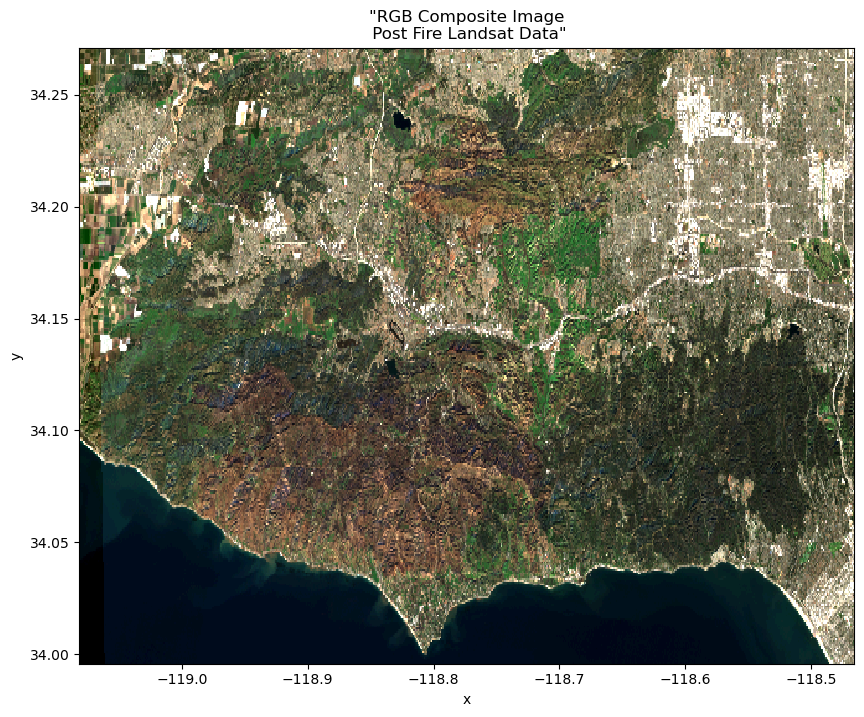

In [9]:
post_rgb = (post_xr[[3,2,1],:,:])
post_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Post Fire Landsat Data"')
plt.show()

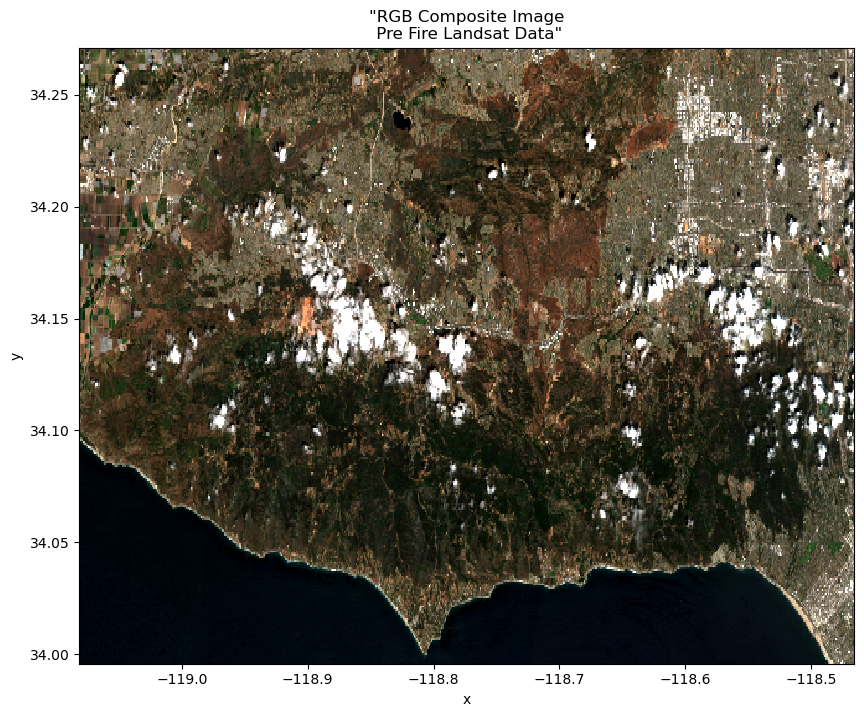

In [10]:
pre_rgb = (pre_xr[[3,2,1],:,:])
pre_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Pre Fire Landsat Data"')
plt.show()

4. Calculate the NDVI and map both dates.

In [19]:
#NDVI_xr = (NIR_xr - red_xr)/(NIR_xr + red_xr)

post_NIR = (post_xr[7])
post_red = (post_xr[3])

NDVI_post = (post_NIR - post_red)/(post_NIR + post_red)

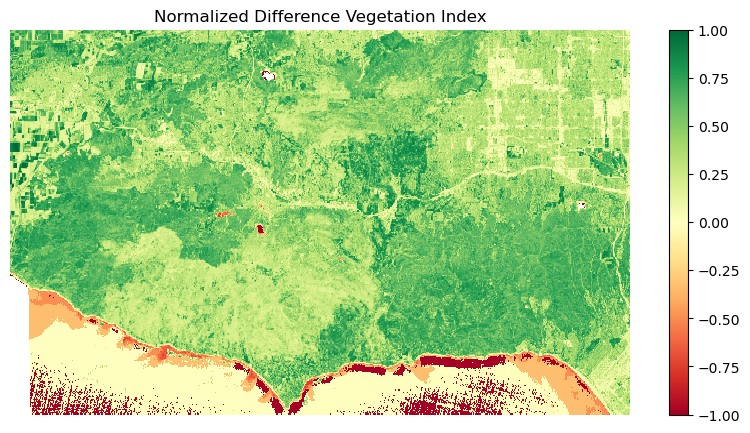

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
NDVI_post.plot(cmap="RdYlGn")
ax.set(title="Normalized Difference Vegetation Index")
ax.set_axis_off()
plt.show()

In [25]:
pre_NIR = (pre_xr[8])
pre_red = (pre_xr[4])

NDVI_pre = (pre_NIR - pre_red)/(pre_NIR + pre_red)

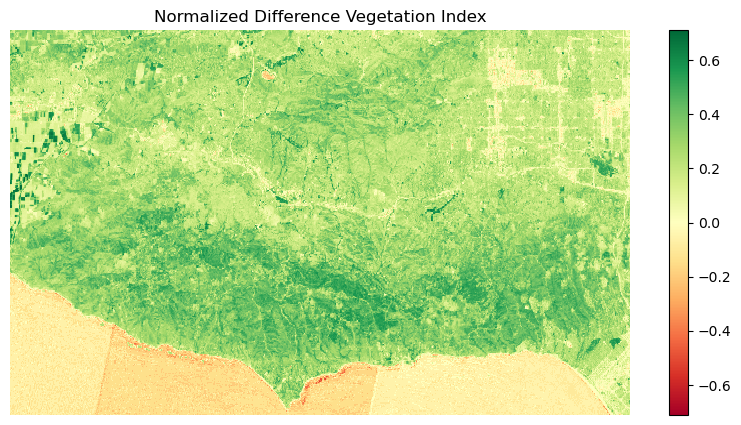

In [26]:
f, ax = plt.subplots(figsize=(10, 5))
NDVI_pre.plot(cmap="RdYlGn")
ax.set(title="Normalized Difference Vegetation Index")
ax.set_axis_off()
plt.show()

5. Write a few sentences of what differences you see between the RGB/NDVI maps. 

The RGB and NDVI maps show the same effects of the fire in different ways. The RGB allows you to visualize the direct effect of the fire, since the image is satellite view. The NDVI allows you to see the decrease in vegetation post fire, since the NDVI is a vegetation index. Therefore, both maps convey the same message but NDVI would only be used for fire-type scenarios. If we were analyzing the results of another natural disaster, we may not need to note the difference in vegetation but may still want to see the damage using the RGB. 